# Evaluation of Artificial Neural Networks

# Introduction

Recurrent ANN aree architectures focused in the processing of sequential
data such as time series, speech, and natural language processing. This
ANN keeps information thanks to its structure.

In contrast with MLP, RNN or Recurrent Neural Network are used with
sequential data, similar to a modified Markov chain, using past
information to predict future values, this approach starts getting the
concept of context.

# Core Concepts and Methods

## Historical Context and Development

The concept of recurrent connections in neural networks dates back to
1960s. Frank Rosenblatt introduced “close-loop cross-coupled
perceptrons” in, which included recurrent connections in a three-layered
perceptron network. These connections allowed the network to keep a kind
of memory, updating weights based on a Hebbian learning rule
@wikipedia2025rnn. Further developments were made by Kaoru Nakano in
1971 and ShunIchi Amari in 1972, who explored similar architectures with
recurrent connections @wikipedia2025rnn.

## Architecture and Working Principles

RNNs are characterized by their ability to maintain a hidden state that
gets updated as the network processes each element in a sequence. This
hidden state acts as some sort of memory, influencing future outputs.
The basic structure of an RNN can be visualized as a “rolled” network,
where the same set of weights is used across different time steps,
creating a loop that allows information to flow back through the network
@medium2025rnn.

## Applications

RNNs have found applications in a wide range of fields, including:

-   Natural Language Processing (NLP): RNNs are used for tasks such as
    language modeling, machine translation, and sentiment analysis. They
    can capture the context and dependencies between words in a
    sentence, which is crucial for understanding language @ibm2025rnn.

-   Speech Recognition: RNNs are employed to convert spoken language
    into text by processing audio signals sequentially and recognizing
    patterns in the sound waves @ibm2025rnn.

-   Time Series Prediction: In finance and economics, RNNs are used to
    predict future values based on historical data, such as stock prices
    or economic indicators @networkencyclopedia2025rnn.

-   Healthcare: RNNs have been applied to analyze medical time series
    data, such as ECG signals or patient vital signs, to detect
    anomalies or predict health outcomes @mdpi2025review.

-   Music Generation: RNNs can generate musical sequences by learning
    patterns in existing music, allowing for the creation of new
    compositions that follow similar structures
    @networkencyclopedia2025rnn.

# Challenges and Advances

Despite their effectiveness, RNNs face several challenges, particularly
with long-term dependencies. Traditional RNNs can struggle to maintain
relevant information over long sequences due to issues like vanishing
and exploding gradients during training. To address these issues,
variants such as Long Short-Term Memory (LSTM) and Gated Recurrent Units
(GRU) have been developed. These architectures include gating mechanisms
that allow the network to selectively remember or forget information,
improving performance on long sequences @geeksforgeeks2025gru.

# RNN Implementation

Here, a simple RNN implementation in Python is made using tensorflow.

In [1]:
!pip install tensorflow
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install nltk
!pip install plotly

Importing Modules ans Libraries

In [2]:
import warnings
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

warnings.filterwarnings("ignore")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

Loading the dataset

<Axes: xlabel='Rating', ylabel='count'>

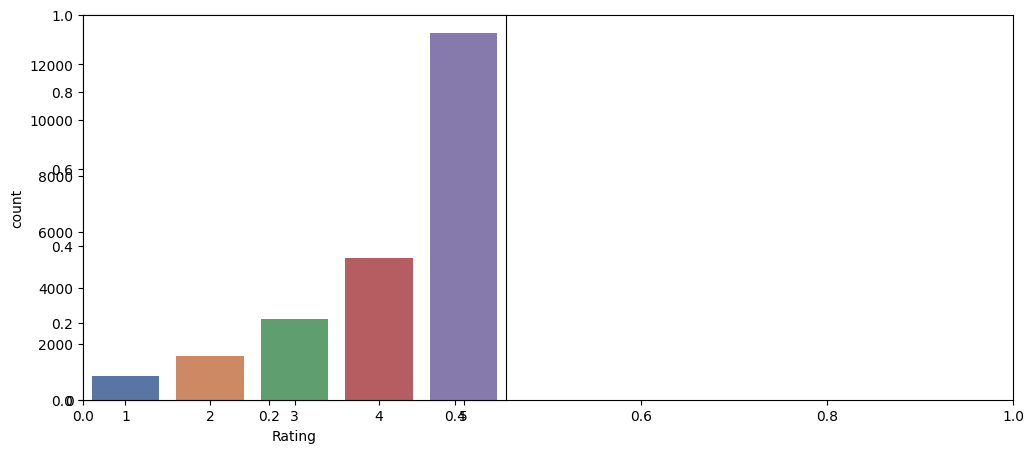

In [3]:
data = pd.read_csv("Clothing-Review.csv")
data.head(7)

data = data[data['Class Name'].isnull() == False]
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Rating',palette="deep")

Exploratory Data Analysis

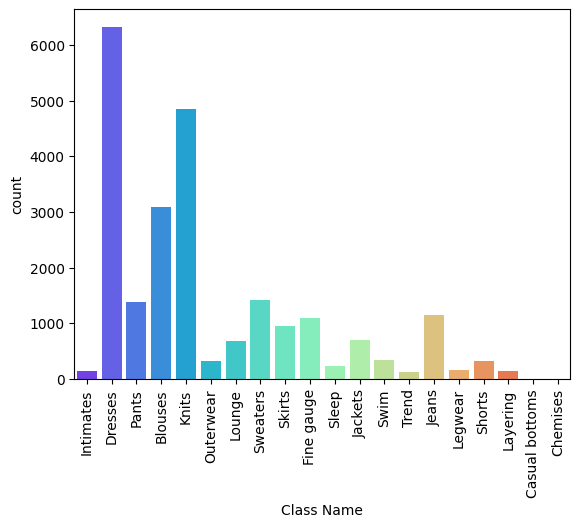

In [4]:
sns.countplot(data=data, x='Class Name', palette='rainbow')
plt.xticks(rotation=90)
plt.show()

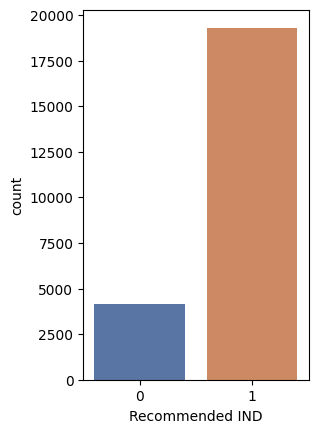

In [5]:
plt.subplot(1, 2, 2)
sns.countplot(data=data, x="Recommended IND", palette="deep")
plt.show()
fig = px.histogram(data, marginal='box',
                   x="Age", title="Age Group",
                   color="Recommended IND",
                   nbins=65-18,
                   color_discrete_sequence=['green', 'red'])
fig.update_layout(bargap=0.2)

In [6]:
fig = px.histogram(data,
                   x="Age",
                   marginal='box',
                   title="Age Group",
                   color="Rating",
                   nbins=65-18,
                   color_discrete_sequence
                   =['black', 'green', 'blue', 'red', 'yellow'])
fig.update_layout(bargap=0.2)

Preparing the data to build the model

In [7]:
def filter_score(rating):
    return int(rating > 3)

features = ['Class Name', 'Title', 'Review Text']

X = data[features]
y = data['Rating']
y = y.apply(filter_score)

In [8]:
def toLower(data):
    if isinstance(data, float):
        return '<UNK>'
    else:
        return data.lower()

stop_words = stopwords.words("english")

def remove_stopwords(text):
    no_stop = []
    for word in text.split(' '):
        if word not in stop_words:
            no_stop.append(word)
    return " ".join(no_stop)

def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

X['Title'] = X['Title'].apply(toLower)
X['Review Text'] = X['Review Text'].apply(toLower)

X['Title'] = X['Title'].apply(remove_stopwords)
X['Review Text'] = X['Review Text'].apply(remove_stopwords)

X['Title'] = X['Title'].apply(lambda x: lemm.lemmatize(x))
X['Review Text'] = X['Review Text'].apply(lambda x: lemm.lemmatize(x))

X['Title'] = X['Title'].apply(remove_punctuation_func)
X['Review Text'] = X['Review Text'].apply(remove_punctuation_func)

X['Text'] = list(X['Title']+X['Review Text']+X['Class Name'])


X_train, X_test, y_train, y_test = train_test_split(
    X['Text'], y, test_size=0.25, random_state=42)

In [9]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [10]:
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

train_pad = pad_sequences(train_seq,
                          maxlen=40,
                          truncating="post",
                          padding="post")
test_pad = pad_sequences(test_seq,
                         maxlen=40,
                         truncating="post",
                         padding="post")

Creating the RNN Model

In [11]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=40))
model.add(keras.layers.SimpleRNN(64, return_sequences=True))
model.add(keras.layers.SimpleRNN(64))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.build(input_shape=(None, 40))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 40, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 40, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,057 (4.99 MB)

 Trainable params: 1,309,057 (4.99 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


history = model.fit(train_pad,
                    y_train,
                    epochs=5)

results = model.evaluate(test_pad, y_test)

Epoch 1/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7787 - loss: 0.5192
Epoch 2/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.8126 - loss: 0.4635
Epoch 3/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7758 - loss: 0.4764
Epoch 4/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.7826 - loss: 0.4916
Epoch 5/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7883 - loss: 0.4834
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7598 - loss: 0.5343


dict_keys(['accuracy', 'loss'])


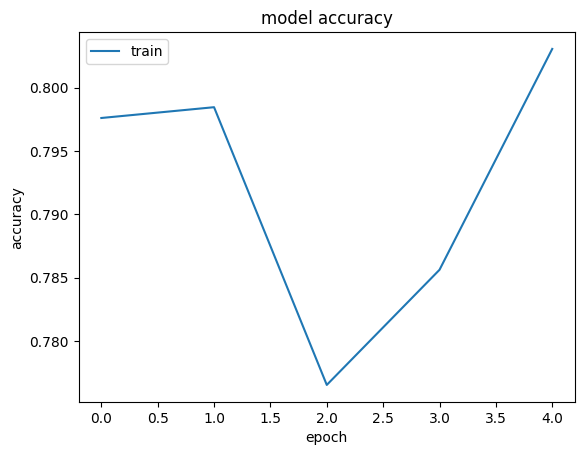

[0.5282278656959534, 0.7680640816688538]


In [15]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print(results)

# Conclusion

RNN are actually usefuill for a majority of applications that nowadays
are based on context needed events. Despite it’s advantages, some new
insights were needed letting more complex tasks to be done and aiming to
achieve better results increasing it’s application areas.